# **Question 1: Network Routing Problem with Beam Search**
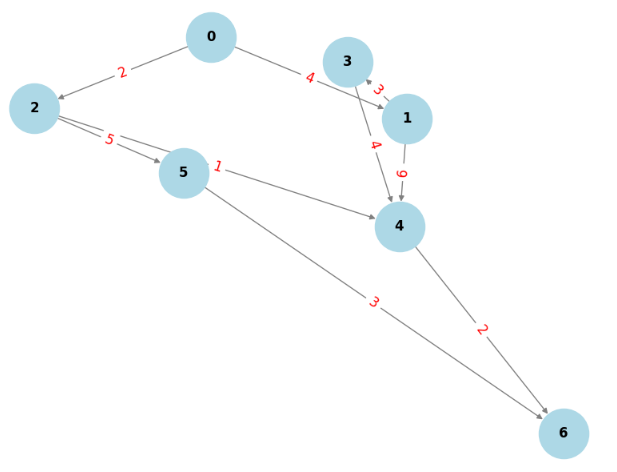


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import matplotlib


# Create a directed graph using networkx
def create_graph():
    G = nx.DiGraph()


    # Add edges with weights (latency)


    G.add_edge(0, 1, weight=4)
    G.add_edge(0, 2, weight=2)
    G.add_edge(1, 3, weight=3)
    G.add_edge(1, 4, weight=6)
    G.add_edge(2, 4, weight=1)
    G.add_edge(2, 5, weight=5)
    G.add_edge(3, 4, weight=4)
    G.add_edge(4, 6, weight=2)
    G.add_edge(5, 6, weight=3)

    return G

In [10]:
# Heuristic function: estimates the remaining latency from `current_node` to `target_node`
# One possible heuristic: Take the minimum edge weight in the graph and multiply it by the estimated remaining hops.
def heuristic(current_node, target_node, graph):
    min = 9999
    for u in G.edges.data("weight"):
        if min > u[2]:
            min = u[2]
    return min*abs(target_node-current_node)

G = create_graph()
heuristic(1,4,G)

3

In [11]:
# visualize the Graph and the Path for your understanding
def visualize_graph(graph, path=None):
    seed = 13648
    pos = nx.spring_layout(graph, seed=seed)
    node_size = 750
    nodes = nx.draw_networkx_nodes(graph, pos, node_size=node_size, node_color="indigo")

    edge_labels = nx.get_edge_attributes(graph, 'weight')
    edges = nx.draw_networkx_edges(
        graph,
        pos,
        node_size=node_size,
        arrowstyle="->",
        arrowsize=10,
        edge_color="black",
        edge_cmap=plt.cm.plasma,
        width=2,
    )

    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8, font_color="black")

    if path is not None:
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        path_edges_drawn = nx.draw_networkx_edges(
            graph,
            pos,
            edgelist=path_edges,
            edge_color="red",
            width=3,
            arrowstyle="->",
            arrowsize=10,
        )

    pc = matplotlib.collections.PatchCollection(edges, cmap=plt.cm.plasma)
    pc.set_array(range(2, graph.number_of_edges() + 2))

    ax = plt.gca()
    ax.set_axis_off()

    node_labels = {i: str(i) for i in graph.nodes}
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=12, font_color="white")

    plt.title("Directed Graph with Node Values and Path Highlighted" if path else "Directed Graph with Node Values")
    plt.show()


#visualize_graph(G,[0,1,4,6])



In [12]:

def beam_search(graph, source, target, beam_width=2):
    q = []
    heapq.heappush(q, (0, [source]))
    visited = set()

    while q:
        paths = []

        for _ in range(min(beam_width, len(q))):
            path_cost, path = heapq.heappop(q)
            current = path[-1]
            estimate = heuristic(current,target,graph)
            if current == target:
                return path, path_cost

            if current not in visited:
                visited.add(current)

                for neighbor in graph.neighbors(current):
                    weight = graph[current][neighbor]['weight']
                    if neighbor not in visited:
                        new_path = path + [neighbor]
                        new_cost = path_cost + weight
                        heapq.heappush(paths, (new_cost, new_path))

        q = sorted(paths)[:beam_width]

    return None, -10000


Optimal Path: [0, 2, 4, 6]
Total Latency: 5


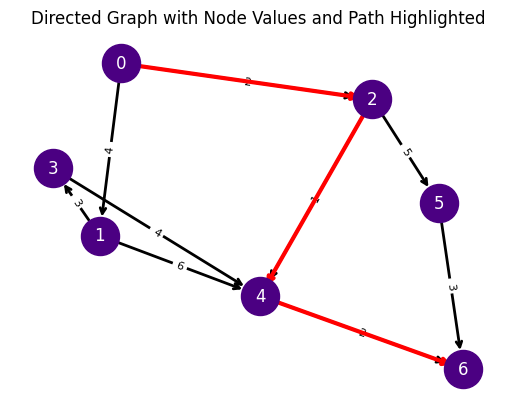

In [13]:
# graph, source and target nodes
graph = create_graph()
source = 0
target = 6

# Perform beam search with different beam values and compare results
beam_width = 3
path, total_latency = beam_search(graph, source, target, beam_width)

if path:
    print(f"Optimal Path: {path}")
    print(f"Total Latency: {total_latency}")
else:
    print("No path found.")

# visualize the graph and the optimal path
visualize_graph(graph, path)   ### Optional to implement (for your understanding)


# **Question 2: Energy-Efficient Cooling System Optimization using Simulated Annealing**

In [14]:
import random
import math

def simulated_annealing(initial_temp, target_temp, cooling_rates, energy_costs, cooling_factor, max_iterations, alpha, beta):
    """
    Simulated Annealing algorithm to optimize energy-efficient cooling.

    Parameters:
    - initial_temp: The starting room temperature (°C).
    - target_temp: The desired room temperature (°C).
    - cooling_rates: A list of possible cooling rates (°C per minute).
    - energy_costs: A corresponding list of energy consumption values (Watts) for each cooling rate.
    - cooling_factor: The rate at which the probability of accepting worse solutions decreases.
    - max_iterations: Maximum number of iterations before stopping.
    - alpha: Weight for temperature difference in heuristic function.
    - beta: Weight for energy consumption in heuristic function.

    Returns:
    - A tuple containing:
        - The sequence of cooling decisions (fan speeds used at each step).
        - The total time required to reach the target temperature.
        - The total energy consumed during the process.
    """

    # TODO: Initialize temperature, energy, and cooling factor
    current_temp = initial_temp
    total_energy = 0
    total_time = 0
    temperature = 100  # Initial simulated annealing temperature
    sequence = []

    for iteration in range(max_iterations):
        # TODO: Check stopping condition (if current temperature is below target)
        if current_temp <= target_temp:
            break

        # TODO: Select a random cooling rate and calculate new temperature
        index = random.randint(0, len(cooling_rates) - 1)
        cooling_rate = cooling_rates[index]
        energy_cost = energy_costs[index]
        new_temp = max(target_temp, current_temp - cooling_rate)  # Ensure new temperature does not go below target

        # TODO: Compute heuristic function h(T)
        h_current = alpha * (current_temp - target_temp) + beta * total_energy
        h_new = alpha * (new_temp - target_temp) + beta * (total_energy + energy_cost)

        # TODO: Accept better moves, or accept worse moves with some probability
        if h_new < h_current or random.random() < math.exp((h_current - h_new) / temperature):
            current_temp = new_temp
            total_energy += energy_cost
            total_time += 1
            sequence.append((cooling_rate, energy_cost))

        # TODO: Gradually decrease temperature
        temperature *= cooling_factor

        # TODO: Print iteration details (for debugging)
        print(f"Iteration {iteration + 1}: Cooling Rate = {cooling_rate}°C/min, Energy Cost = {energy_cost}W, "
              f"New Temp = {current_temp}°C, Total Energy = {total_energy}W, Temperature Factor = {temperature}")

    return sequence, total_time, total_energy

# Initial conditions and function call
initial_temp = 30  # Starting temperature (°C)
target_temp = 22  # Desired temperature (°C)
cooling_rates = [1, 2, 3, 4]  # Cooling rates in °C per minute
energy_costs = [100, 180, 250, 320]  # Energy consumption in Watts for each cooling rate
cooling_factor = 0.95  # Cooling factor for simulated annealing
max_iterations = 80  # Maximum number of iterations
alpha = 1  # Weight for temperature difference
beta = 0.1  # Weight for energy consumption

sequence, total_time, total_energy = simulated_annealing(initial_temp, target_temp, cooling_rates, energy_costs, cooling_factor, max_iterations, alpha, beta)

print("\nFinal Results:")
print("Cooling sequence (rate, energy cost):", sequence)
print("Total time required:", total_time, "minutes")
print("Total energy consumed:", total_energy, "W")


Iteration 1: Cooling Rate = 2°C/min, Energy Cost = 180W, New Temp = 28°C, Total Energy = 180W, Temperature Factor = 95.0
Iteration 2: Cooling Rate = 4°C/min, Energy Cost = 320W, New Temp = 24°C, Total Energy = 500W, Temperature Factor = 90.25
Iteration 3: Cooling Rate = 4°C/min, Energy Cost = 320W, New Temp = 22°C, Total Energy = 820W, Temperature Factor = 85.7375

Final Results:
Cooling sequence (rate, energy cost): [(2, 180), (4, 320), (4, 320)]
Total time required: 3 minutes
Total energy consumed: 820 W
